In [1]:
using DataFrames, CSV, PyPlot, FITSIO, FITSTables, Statistics, PyCall
LogNorm = pyimport("matplotlib.colors").LogNorm
include("bin.jl");

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/aw/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [10]:
df = FITS(DataFrame ∘ last, "random_30000_all_k1000.classified.fits");

In [11]:
lamostxgaia = FITS(DataFrame ∘ last, "../cats/LAMOST-dr5v3-designations-coords-gaia.fits");

In [12]:
df = join(df, lamostxgaia, on=:designation);

In [19]:
df.couldflag = df.EEW_err .< 0.05;
df.flagged = df.isline .& (df.EEW .> 0.15) .& (df.couldfalg);

ArgumentError: ArgumentError: column name :couldfalg not found in the data frame; existing most similar names are: :couldflag

In [14]:
α = df.ra
δ = df.dec
r = hcat((cos.(α) .* cos.(δ)),
             (sin.(α) .* cos.(δ)),
             (sin.(δ)))
A = [0.0548755604162154 +0.4941094278755837 -0.8676661490190047
              -0.8734370902348850 -0.4448296299600112 -0.1980763734312015
              -0.4838350155487132 +0.7469822444972189 +0.4559837761750669]
rGal = df.rest .* (r * A)
;

In [15]:
mask = .! any(isnan.(rGal), dims=2)[:]
rGal = rGal[mask, :]
df = df[mask, :]
;

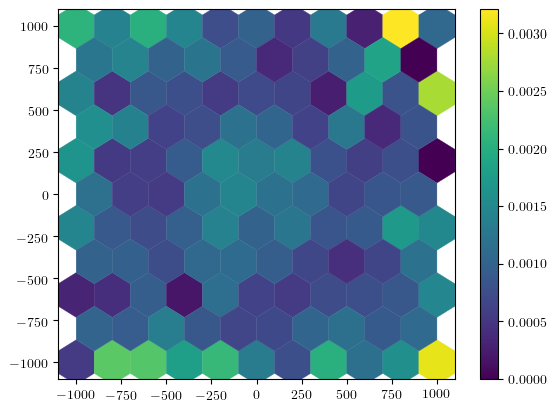

PyObject <matplotlib.colorbar.Colorbar object at 0x1eae5c490>

In [20]:
censoredmean(f) = length(f) > 300 ? mean(f) : NaN
mask = df.couldflag
hexbin(rGal[mask, 1], rGal[mask, 2], C=df.flagged[mask], gridsize=10, 
       reduce_C_function=censoredmean, linewidths=(0.25,), extent=[-1000,1000,-1000,1000])
colorbar()

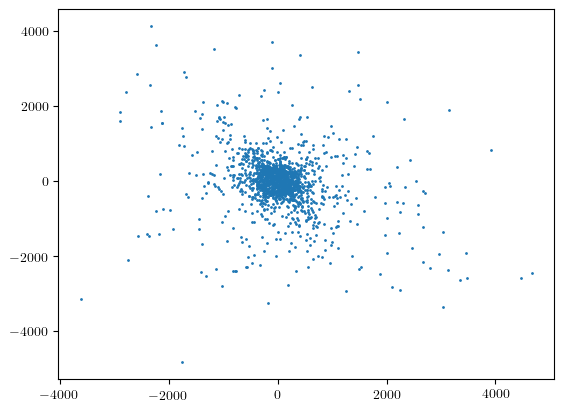

PyObject <matplotlib.collections.PathCollection object at 0x1ff9b4650>

In [17]:
mask = df.couldflag .& (df.logg .> 3) .& df.flagged
scatter(rGal[mask, 1], rGal[mask, 2], s=1)
